In [1]:
# Run this cell to set up the notebook, but please don't change it.

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

# Background
"The Vietnam War (Vietnamese: Chiến tranh Việt Nam), also known as the Second Indochina War, and in Vietnam as the Resistance War Against America (Vietnamese: Kháng chiến chống Mỹ) or simply the American War, was a conflict in Vietnam, Laos, and Cambodia from 1 November 1955 to the fall of Saigon on 30 April 1975." - Wikipedia.

The Vietnam War was the last war in which the United States employed a policy of conscription—"the compulsory induction of individuals into the Armed Services". Conscription means you are forced to join the military under certain legal penalties. 

Men are chosen to be conscripted by the "draft".

This assignment is in part inspired by an assignment from Professor Yun S. Song's STAT 135 class.

# Part 1: The 1969 Draft Lottery
The first draft of the Vietnam War took place on December 1st, 1969. Men aged 19-26, born in 1944-1950, were eligible to be drafted. 366 plastic lottery balls, representing every day of the year, and the leap day February 29th, were placed into an urn and selected one at a time and the order was recorded. For the 1969 lottery, all men with birthdays whose corresponding lottery balls were selected 195th or lower were drafted\*.

\*drafted in this case means "classified as available for military service, were called to report for possible induction."

Run the following cell to load in the `lotto` table.

The `lotto` table was sourced from [randomservices.org](https://www.randomservices.org/random/data/Draft.html).

In [2]:
# Read in the data
lotto = Table.read_table("lottery.tsv", sep="\t")
lotto

M,D,N69,N70,N71,N72
1,1,305,133,207,150
1,2,159,195,225,328
1,3,251,336,246,42
1,4,215,99,264,28
1,5,101,33,265,338
1,6,224,285,242,36
1,7,306,159,292,111
1,8,199,116,287,206
1,9,194,53,338,197
1,10,325,101,231,37


The `lotto` table contains the columns `M` and `D` corresponding to the month and day of the birthdays on the lottery balls, and a column for each draft that contains the order that the birthday was drawn in each of the four draft lotteries. For this section we are only interested in the \`69 draft which would be the `N69` column.

## Section 1: Investigating December
Let's check to see if the 1969 lottery process was truly random and fair.

The `lotto69` table has only the columns from the `lotto` table pertinent to the 1969 draft.

In [3]:
lotto69 = lotto.select("M", "D", "N69")

**Question 1.1.1:** Let's investigate the data visually first. Draw a scatter plot of draft number vs month.

*Note: although month is a categorical value we are using it as a numerical value for the sake of this plot.*

```
BEGIN QUESTION
name: q1_1_1
manual: true
```

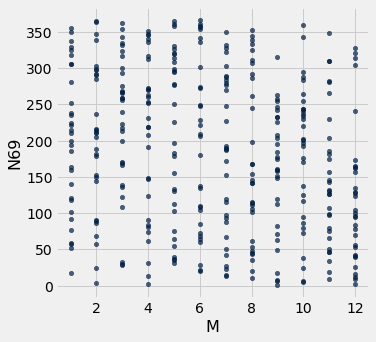

In [4]:
lotto69.scatter("M", "N69") # SOLUTION

**Question 1.1.2:** It's a bit hard to tell what's happening in that plot. Aggregate the data and plot a bar chart of the average draft number vs month.

```
BEGIN QUESTION
name: q1_1_2
manual: true
```

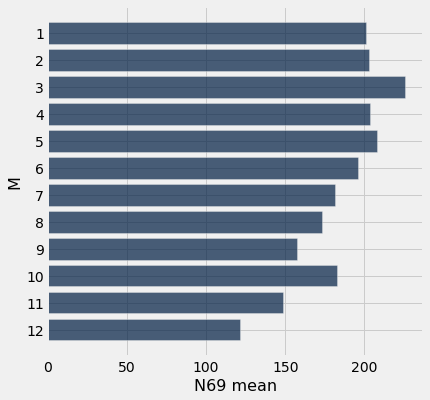

In [5]:
lotto69.group("M", np.mean).barh("M", "N69 mean") # SOLUTION

It seems that December (month 12) has a lower average draft number than the other months.

**Question 1.1.3:** How many birthdays in December were chosen to be drafted? Recall that if your lottery number was less than or equal to 195, you would be drafted.

```
BEGIN QUESTION
name: q1_1_3
```

In [6]:
num_drafted = lotto69.where("N69", are.below_or_equal_to(195)).where("M", 12).num_rows # SOLUTION
num_drafted

26

In [7]:
# TEST
# Make sure your answer is a number
0 <= num_drafted <= 31

True

In [8]:
# HIDDEN TEST
num_drafted == 26

True

We will perform a hypothesis test to check if this high number of birthdays selected in December, 1969, is statistically significant: was the lottery truly random?

**Question 1.1.4:** What is our null hypothesis?
```
BEGIN QUESTION
name: q1_1_4
manual: true
```

**SOLUTION:** Each birthday had an equal likelihood of being picked, the number of birthdays selected in December was due to chance.

**Question 1.1.5:** What is our alternative hypothesis?
```
BEGIN QUESTION
name: q1_1_5
manual: true
```

**SOLUTION:** Birthdays in December were more likely to be selected.

The test statistic we will use is the number of birthdays selected in December.

**Question 1.1.6:** Fill out the function `statistic` that returns one value of our test statistic given an array of draft numbers for the 31 days in December.

```
BEGIN QUESTION
name: q1_1_6
```

In [9]:
def statistic(dec_array):
    return np.count_nonzero(dec_array <= 195) # SOLUTION

obs_test_stat = statistic(lotto69.where("M", 12).column("N69")) # SOLUTION
obs_test_stat

26

In [10]:
# TEST 
# Your observed test statistic should be the same as what you found in question 3
obs_test_stat == num_drafted

True

In [11]:
# HIDDEN TEST
statistic(make_array(195, 196, 194)) == 2

True

**Question 1.1.7:** Fill out the function `simulate` to simulate one sample under the null hypothesis and return a value of our test statistic. 

*Hint 1: Draft numbers start at 1!*

*Hint 2: Remember that leap year birthdays are included!*

```
BEGIN QUESTION
name: q1_1_7
```

In [12]:
# These should be useful!
num_days_dec = 31 
possible_draft_numbers = np.arange(1, 367) # SOLUTION

def simulate():
    sample_dec_array = np.random.choice(possible_draft_numbers, num_days_dec, replace=False) # SOLUTION
    return statistic(sample_dec_array) # SOLUTION

simulate()

18

In [13]:
# TEST
# Remember leap years!
len(possible_draft_numbers) == 366

True

In [14]:
# TEST
# Your function should return a value of the test statistic
0 <= simulate() <= 31

True

In [15]:
# TEST 
# Your function has no randomness
np.std([simulate() for i in np.arange(10)]) > 0

True

**Question 1.1.8:** Simulate and store 10000 values of the test statistic in the array `test_stats` and draw a histogram of the values.

```
BEGIN QUESTION
name: q1_1_8
manual: true
```

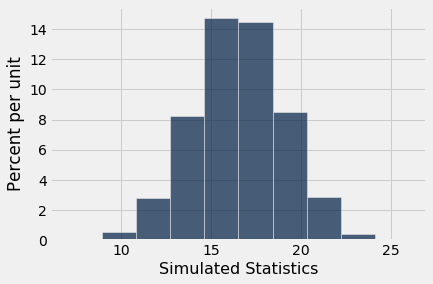

In [16]:
test_stats = make_array() # SOLUTION
reps = 10000 # SOLUTION

# BEGIN SOLUTION
for i in np.arange(reps):
    one_stat = simulate()
    test_stats = np.append(test_stats, one_stat)
# END SOLUTION

Table().with_columns("Simulated Statistics", test_stats).hist("Simulated Statistics")

**Question 1.1.9:** Compute the p-value of the hypothesis test and assign it to `dec_p_val`.

```
BEGIN QUESTION
name: q1_1_9
```

In [17]:
dec_p_val = np.count_nonzero(test_stats >= obs_test_stat) / reps # SOLUTION
dec_p_val

0.0001

In [18]:
# TEST
# A p-value is a proportion
0 <= dec_p_val <= 1.0

True

In [19]:
# HIDDEN TEST
dec_p_val <= 0.0015

True

**Question 1.1.10:** According to the [New York Times](https://www.nytimes.com/1970/01/04/archives/statisticians-charge-draft-lottery-was-not-random.html), 
> "draft officials acknowledge, the capsules with the later months were not mixed as thoroughly as those of the earlier months." 

Using a p-value cutoff of 5%, assign `reject_dec` to a boolean expression that evaluates to `True` if we should reject the null hypothesis and `False` if we fail to.

```
BEGIN QUESTION
name: q1_1_10
```

In [20]:
reject_dec = dec_p_val <= 0.05 # SOLUTION
reject_dec

True

In [21]:
# TEST
# reject should be a boolean
type(reject_dec) == bool or type(reject_dec) == np.bool_

True

In [22]:
# HIDDEN TEST
reject_dec == True

True

## Section 2: The Other Months

It appears that December had some issues in the lottery, but what about the other months? For each month let's test a slightly different hypothesis, not that the number drafted in that month is too high, but that it is either too high or too low.

**Question 1.2.1:** Define the function `new_stat` that computes the value for our new test statistic given `prop_selected`, the proportion of days in the month selected in a sample. Our new test statistic is the absolute difference between the sample proportion selected and the expected proportion selected.

```
BEGIN QUESTION
name: q1_2_1
```

In [23]:
def new_stat(prop_selected):
    return abs(prop_selected - 195/366) # SOLUTION

dec_new_stat = new_stat(26/31)
dec_new_stat

0.3059227921734532

In [24]:
# TEST
# Your statistic should return a proportion
0 <= dec_new_stat <= 1

True

In [25]:
# HIDDEN TEST
round(new_stat(0), 3) == 0.533

True

In [26]:
# HIDDEN TEST
round(dec_new_stat, 3) == 0.306

True

In [27]:
# HIDDEN TEST
round(new_stat(1), 3) == 0.467

True

**Question 1.2.2:** Define the function `new_simulate` that takes in an integer, `month`, and returns an array of 1000 simulated values of our new statistic under the null hypothesis.

*Hint: The table* `months` *should be very helpful!*

```
BEGIN QUESTION
name: q1_2_2
manual: true
```

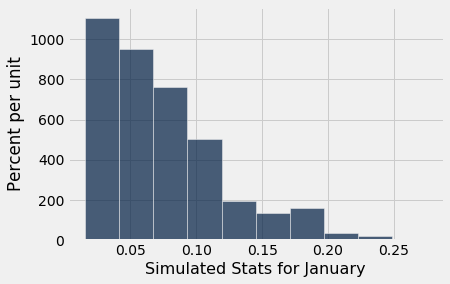

In [28]:
months = lotto69.group("M")

def new_simulate(month):
    num_days_in_month = months.where("M", month).column("count").item(0) # SOLUTION
    reps = 1000 # SOLUTION
    
    test_stats = make_array() # SOLUTION
    
    for i in np.arange(reps):
        one_sample = np.random.choice(possible_draft_numbers, num_days_in_month, replace=False) # SOLUTION
        prop_selected_sample =  np.count_nonzero(one_sample <= 195) / num_days_in_month # SOLUTION
        one_new_stat = new_stat(prop_selected_sample) # SOLUTION
        test_stats = np.append(test_stats, one_new_stat) # SOLUTION
        
    return test_stats # SOLUTION

# DON'T CHANGE THE LINE
Table().with_column('Simulated Stats for January', new_simulate(1)).hist(0, bins=10) # Simulated stats for January

**Question 1.2.3:** Define the function `calc_p` that takes in an integer, `month` as an argument and returns the empirical p-value of the hypothesis test for that month.

*Hint: Add extra cells to test different pieces of your code!*

```
BEGIN QUESTION
name: q1_2_3
```

In [29]:
def calc_p(month):
    simulated_test_stats = new_simulate(month) # SOLUTION
    observed_num_drafted = np.count_nonzero(lotto69.where("M", month).column("N69") <= 195) # SOLUTION
    num_days_in_month = months.where("M", month).column("count").item(0) # SOLUTION
    observed_value = new_stat(observed_num_drafted / num_days_in_month) # SOLUTION
    p_val = np.count_nonzero(simulated_test_stats >= observed_value) / 1000 # SOLUTION
    return p_val # SOLUTION

january_p_value = calc_p(1)
january_p_value

0.359

In [30]:
# TEST
# Return a p-value
0 <= calc_p(1) <= 1

True

In [31]:
# TEST
# Make sure you are using the month argument
calc_p(3) <= calc_p(7)

True

In [32]:
# HIDDEN TEST
calc_p(12) <= 0.01

True

In [33]:
# HIDDEN TEST
calc_p(3) <= 0.05

True

In [34]:
# HIDDEN TEST
calc_p(7) >= 0.6

True

**Question 1.2.4:** Draw a bar chart of the p-values for each month. This might take some time to run.

*Hint: DO NOT TRY CALLING THE FUNCTION ON EVERY ROW IN THE LOTTO TABLE!*

```
BEGIN QUESTION
name: q1_2_4
manual: true
```

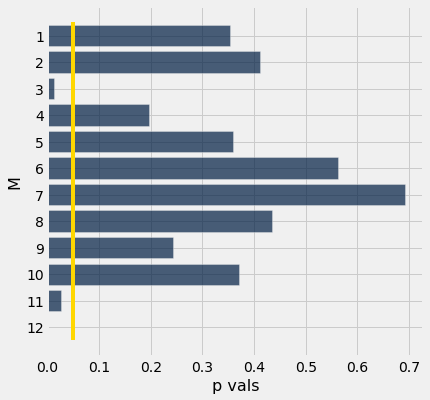

In [35]:
p_vals_per_month = months.apply(calc_p, "M") # SOLUTION
months_and_p_vals = months.with_column("p vals", p_vals_per_month)
months_and_p_vals.barh("M", "p vals")
# DON'T CHANGE THE FOLLOWING LINE OF CODE
plots.plot([0.05, 0.05], [0, 12], color="gold"); # Plots the cutoff of 5%

You should see 3 months with significant results.

**For the next 2 questions we are using a 5% p-value cutoff.**

**Question 1.2.5:** What is the probability that if the null hypothesis is true, we still reject it? This is also called the false positive rate or "alpha". Assign that value to `alpha`.

```
BEGIN QUESTION
name: q1_2_5
```

In [36]:
alpha = 0.05 # SOLUTION
alpha

0.05

In [37]:
# TEST
# alpha needs to be a probability
0 <= alpha <= 1

True

In [38]:
# HIDDEN TEST
alpha == 0.05

True

**Question 1.2.6:** What is the probability that we get at least one false positive, if the null hypothesis is true, and we run 12 hypothesis tests (like we did above)? Assign that probability to `multiple_alpha`.

```
BEGIN QUESTION
name: q1_2_6
```

In [39]:
multiple_alpha = 1 - (1-0.05)**12 # SOLUTION
multiple_alpha

0.45963991233736334

In [40]:
# TEST 
# multiple_alpha should be a probability
0 <= multiple_alpha <= 1

True

In [41]:
# TEST
# The probability should increase
multiple_alpha > alpha

True

In [42]:
# HIDDEN TEST
round(multiple_alpha, 4) == 0.4596

True

Yikes, that number is pretty high. Luckily, statisticians have developed a few ways to deal with this problem.

**Question 1.2.7:** One way to deal with this issue is to use a lower p-value cutoff. To determine our new p-value cutoff, we can divide our original cutoff by the number of tests we are running. Calculate the probability of getting at least one false positive if we run 12 hypothesis tests and use this new adjusted p-value cutoff, assuming the null hypothesis is true in each case. Assign that value to `bonferroni`.

```
BEGIN QUESTION
name: q1_2_7
```

In [43]:
adjusted_cutoff = 0.05 / 12 # SOLUTION
bonferroni = 1 - (1- adjusted_cutoff)**12 # SOLUTION
bonferroni

0.04886993281129881

In [44]:
# TEST 
# bonferroni should be a probability
0 <= bonferroni <= 1

True

In [45]:
# TEST
# The probability should decrease
multiple_alpha > bonferroni

True

In [46]:
# HIDDEN TEST
round(bonferroni, 4) == 0.0489

True

**Question 1.2.8:** Assign `num_sig` to the number of our hypothesis tests that were significant using our normal cutoff value. Assign `num_sig_adjusted` to the number of hypothesis tests that were significant using this new "adjusted" p-value cutoff.


```
BEGIN QUESTION
name: q1_2_8
```

In [47]:
num_sig = months_and_p_vals.where("p vals", are.below(0.05)).num_rows # SOLUTION
num_sig_adjusted = months_and_p_vals.where("p vals", are.below(0.05/12)).num_rows # SOLUTION

print(f"Number of months significant: {num_sig}; Number of months significant after adjustment: {num_sig_adjusted}")

Number of months significant: 3; Number of months significant after adjustment: 1


In [48]:
# TEST
# Between 0 and 12 tests should be significant
0 <= num_sig_adjusted <= num_sig <= 12

True

In [49]:
# HIDDEN TEST
num_sig == 3

True

In [50]:
# HIDDEN TEST
num_sig_adjusted == 1

True

**Question 1.2.9:** There are around 1300 students in Data 8 every semester, and around 500 in the summer. Presumably, each student will run the same hypothesis tests that you have ran in this experiment. Since this assignment is based on a very famous historical example, we can also assume forms of this exact hypothesis test have previously been run thousands if not millions of times. How do you think this huge number of hypothesis tests effects our conclusions, specifically related to our choice of p-value cutoff?


```
BEGIN QUESTION
name: q1_2_9
manual: true
```

**SOLUTION:** Since this hypothesis is tested many, many times, the likelihood of false positives occuring at any point are essentially guaranteed, and we may have to use a lower p value cutoff when we do our own tests. This issue is becoming more and more prevalent in Data Science as open source datasets are widely tested. If this topic is interesting to you, it is covered in Data 102!

### Checkpoint (due Friday, 4/2 by 11:59pm PT)
#### Congratulations, you have reached the checkpoint! Run the submit cell below to generate the checkpoint submission. 

In [51]:
_ = ok.submit()

NameError: name 'ok' is not defined

## Section 3: Applying the Central Limit Theorem

As part of a lesson on the Vietnam War, Jill plans on taking a survey of the birthdays of her 45 person class to determine who could have been drafted.

From the previous part, we know that 195 out of 366 of possible birthdates would be eligible. For every following question, we assume birth dates have an equal proportion in the population (this assumption is not true in reality), and we are only concered with the birthdate (ie we don't consider that the draft had limits on age or sex).

**Question 1.3.1:** Which of the following facts tell us that the Central Limit Theorem will dictate the distribution of the number of students with draft eligible birthdays? Assign `choices_clt` to an array that contain integers corresponding to valid statements.

1. The number of people in the class who could be drafted acts like a population sum.
2. Since the population the class is drawn from is *reasonably* large, the class acts like a sample drawn with replacement
3. 195/366 is fairly close to 50%
4. Birthdates in the population are not normally distributed
5. The class size is reasonably large

```
BEGIN QUESTION
name: q1_3_1
```

In [52]:
choices_clt = make_array(1, 2, 5) # SOLUTION

In [53]:
# TEST
# choices should be an array
type(choices_clt) == type(make_array())

True

In [54]:
# HIDDEN TEST
all([i in choices_clt for i in make_array(1, 2, 5)])

True

In [55]:
# HIDDEN TEST
len(choices_clt) == 3

True

**Question 1.3.2:** Plot a histogram of the distribution of the number of students with draft eligible birthdays. Use 10,000 simulated trials.

*Hint: Visualize an emprical distribution of the number of students with draft eligible birthdays in 10,000 simulated samples of size 45.*

```
BEGIN QUESTION
name: q1_3_2
```

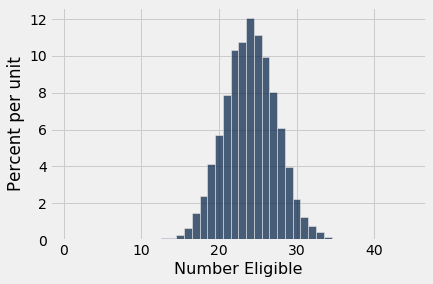

In [56]:
class_nums = make_array() # SOLUTION
reps = 10000 # SOLUTION
draft_proportions = make_array(195/366, 171/366) # SOLUTION
class_size = 45 # SOLUTION

# BEGIN SOLUTION
for i in np.arange(reps):
    one_class_prop = sample_proportions(class_size, draft_proportions)
    one_class_num = one_class_prop.item(0) * class_size
    class_nums = np.append(class_nums, one_class_num)
# END SOLUTION

# DON'T CHANGE THIS LINE
Table().with_column("Number Eligible", class_nums).hist(0, bins=np.arange(0.5,45.5,1))

Load the `birthdays` table in the following cell. The table contains the birthdays of Jill's class.

In [57]:
birthdays = Table().read_table("birthdays.csv")
birthdays.show(10)

M,D
2,22
10,30
4,13
3,16
4,28
7,11
3,15
12,5
2,9
3,29


**Question 1.3.3:** We need to use the lottery information from the `lotto` table to determine which of these birthdays are eligible. Create a new table called `birthdays_new` that has the `M`, `D` from `birthdays` and the `N69` column from `lotto`. The rows should correspond to the 45 rows in the `birthdays` table.

*Hint: Remember that you can join on multiple columns at the same time by passing **lists** as the column arguments. [Example](http://data8.org/datascience/_autosummary/datascience.tables.Table.join.html)*

```
BEGIN QUESTION
name: q1_3_3
```

In [58]:
birthdays_new = birthdays.join(["M", "D"], lotto, ["M", "D"]).select(0, 1, 2) # SOLUTION
birthdays_new

M,D,N69
1,7,306
1,9,194
1,29,349
1,30,164
2,6,347
2,9,338
2,12,68
2,22,290
3,15,169
3,16,166


In [59]:
# TEST
birthdays_new.num_rows == 45

True

In [60]:
# TEST
birthdays_new.labels == ('M', 'D', 'N69')

True

In [61]:
# HIDDEN TEST
print(birthdays_new.take(np.arange(5)))

M    | D    | N69
1    | 7    | 306
1    | 9    | 194
1    | 29   | 349
1    | 30   | 164
2    | 6    | 347


**Question 1.3.4:** Generate a 95% Confidence interval for the sample number of eligible students using 10,000 bootstrap resamples. Assign the bounds to `upper` and `lower`. Make sure to assign the 10,000 resample statistics to the array `resamples_num_eligible`.

*Hint: Do not redo the work you did in 1.3.3, otherwise your code will try to join two tables 10,000 times and run forever!*

```
BEGIN QUESTION
name: q1_3_4
```

95% CI: [13.0, 25.0])


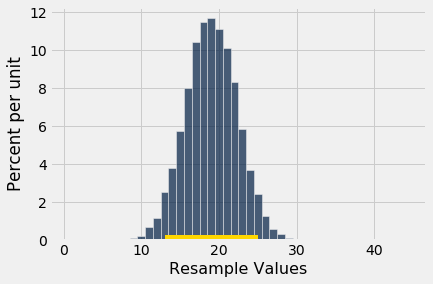

In [62]:
resamples_num_eligible = make_array() # SOLUTION
reps = 10000 # SOLUTION

for i in np.arange(reps):
    resample = birthdays_new.sample() # SOLUTION
    num_eligible = np.count_nonzero(resample.column("N69") <= 195) # SOLUTION
    resamples_num_eligible = np.append(resamples_num_eligible, num_eligible) # SOLUTION

lower = percentile(2.5, resamples_num_eligible) # SOLUTION
upper = percentile(97.5, resamples_num_eligible) # SOLUTION

# DON'T CHANGE THESE LINES OF CODE
Table().with_column("Resample Values", resamples_num_eligible).hist(0, bins=np.arange(0.5,45.5,1))
plots.plot([lower,upper], [0,0], color="gold", lw=10); # Plots the CI
print(f"95% CI: [{lower}, {upper}])")

In [63]:
# TEST
0 <= lower <= upper <= 45

True

In [64]:
# HIDDEN TEST
lower == percentile(2.5, resamples_num_eligible)

True

In [65]:
# HIDDEN TEST
upper == percentile(97.5, resamples_num_eligible)

True

In [66]:
# HIDDEN TEST
18 <= np.mean(resamples_num_eligible) <= 20

True

In [67]:
# HIDDEN TEST
2.5 <= np.std(resamples_num_eligible) <= 4

True

**Question 1.3.5:** Steve did the same exercise with his own class. To see if the number eligible in his class is statistically significant or not, which of the two histograms should he compare his number to and why?


```
BEGIN QUESTION
name: q1_3_5
manual: true
```

**SOLUTION:** He should compare his number to the first histogram, because the first histogram is for sample means not resample means.

**Challenge:** Where do these birthdays come from? Post your guess on the Piazza thread for this section!

# Part 2: Lifetime Earnings

> "A central question in the debate over military manpower policy is whether veterans are adequately compensated for their service. The political process clearly reflects the desire to compensate veterans: since World War II, millions of veterans have enjoyed benefits for medical care, education and training, housing, insurance, and job placement. Recent legislation provides additional benefits for veterans of the Vietnam era. Yet, academic research has not shown 
conclusively that Vietnam (or other) veterans are worse off economically than nonveterans" (Angrist 1990)

Are veterans "adequately compensated"? Can we identify any significant differences in earnings between veterans and non-veterans? This was the central focus of the classic paper ["Lifetime Earnings and the Vietnam Era Draft Lottery: Evidence from Social Security Administrative Records"](https://economics.mit.edu/faculty/angrist/data1/data/angrist90) by [Joshua Angrist](https://en.wikipedia.org/wiki/Joshua_Angrist). In the following section, we will try to use methods we have learned, including hypothesis testing and parameter estimation to investigate this question.

## Section 1: The Data

>"The original CWHS data set does not contain information on date of birth. SSA programmers matched date of birth variables to the CWHS in a special extract created for this project. Lottery numbers were then matched to dates of birth, using tables published in the 1969-73 Semiannual Reports of the Director of Selective Service. The Internal Revenue Service limits disclosure of data collected for tax purposes. To adhere to these disclosure requirements, the SSA could release only aggregate data. The aggregate data set contains sample statistics for cells defined by year of earnings, year of birth, race, and five consecutive lottery numbers. Cell statistics include means, variances, fraction with earnings equal to the taxable maximum, fraction with earnings above the taxable maximum, fraction with zero earnings, and number of observations in each cell." (Angrist 1990)

Angrist collected data from the IRS (Internal Revenue Service-- the tax agency of the United States). The dataset in question is the CWHS: the Continuous Work History Sample, which is a sample of 1% of all eligible social security numbers. You can see what this table looks like by running the following cell.

In [68]:
cwhsb = Table.read_table("cwhsb.csv").drop(0)
cwhsb.show(5)

byr,race,interval,vmn1,vsd1,vnu1,vnms1,vfin1,year,ctr1,type,ltax,xltax
44,1,1,10625.6,7052.47,179,3,0.179,78,15,TAXAB,0.296,0.218
44,1,2,11546.5,8032.55,182,5,0.198,78,15,TAXAB,0.368,0.264
44,1,3,11401.2,7508.27,209,1.5,0.196,78,15,TAXAB,0.335,0.254
44,1,4,10900,7342.6,206,1.5,0.189,78,15,TAXAB,0.311,0.248
44,1,5,11667.1,7507.56,207,0,0.159,78,15,TAXAB,0.415,0.362


**Question 2.1.1:** Each row in `cwhsb` represents tax info of about 200 people grouped by range of birth date (interval represents a group of 5 days of the year). Why do you think the IRS would aggregate the data instead of releasing info for each person individually in the sample?

```
BEGIN QUESTION
name: q2_1_1
manual: true
```

**SOLUTION:** Releasing peoples' tax info is a potential privacy concern, even if you don't put their name or social security number down they might still be identified.

**Question 2.1.2:** How many people are represented in the `cwhsb` table? Assign that value to `total`. 

*Hint: The `vnu1` column tells you how many people each row corresponds to*
```
BEGIN QUESTION
name: q2_1_2
```

In [69]:
total = sum(cwhsb.column("vnu1")) # SOLUTION
total

2867110

In [70]:
# TEST
int(total) == 2867110

True

Angrist applies a number of filters on the data to limit the data to just men of the appropriate ages who were eligible to be drafted in any of the four draft lotteries. After applying these filters, the new table represents only 1,238,734 men. After reproducing these filters, our data is still aggregated data.   

**Question 2.1.3:** Do you think using aggregated data or not-aggregated data would produce a more correct result for any hypothesis tests we perform?

```
BEGIN QUESTION
name: q2_1_3
manual: true
```

**SOLUTION:** Ideally we would use not-aggregated data. Aggregating our data causes us to lose some information about each data point.

For the rest of this section we are going to use artificially disaggregated data. Here's how Yanay disaggregated the data:

1. For each row in `cwshb`, he generated a corresponding number of rows in the new dataset with the same categorical variables (ie birth year, race, birthday interval etc) to represent each person aggregated in the `cwshb` row.
2. For the earnings for each new row, he randomly generated a value for earnings from a distribution that had the same mean and standard deviation as specified for that group in the `cwshb` table. Since the `cwshb` table has info about proportions of people in a group who had 0 earnings, he made sure that a corresponding number of people have an earnings of \$0 for that group in the new table.

For example, for this row from the `cwhsb` table,

![One Row](one_row_cwhsb.png)

Yanay generated 190 rows, 30 of which have earnings of 0 (0.163 * 190 == 30). The distribution of earnings in these rows looks like this:

![One Row Earnings](row_earnings.png)

The 190 rows all correspond to white men born in 1950 who fall into birthday interval 1 (birthday interval 1 contains 5 birth dates that were all eligible to be drafted). The mean of the earnings generated is 9150.06 and the standard deviation is 5562.51, which is close to what was stated in the `cwshb` table (the vmn1 and vsd1 columns contain this info).

The disaggregated rows are stored in the `earnings` table.

In [71]:
earnings = Table.read_table("disag.csv")
earnings.show(10)

earnings,byr,race,interval,eligible
0,50,white,1,True
0,50,white,1,True
0,50,white,1,True
0,50,white,1,True
0,50,white,1,True
0,50,white,1,True
0,50,white,1,True
0,50,white,1,True
0,50,white,1,True
0,50,white,1,True


As stated, Yanay randomly generated the (non zero) earnings by sampling from a distribution with the mean and SD specified, but with a histogram that looks something like this (with appropriate mean and sd):

![Curve Shape](shape_of_curve.png)

**Question 2.1.4:** Do you think using this method of disaggregating data is completely accurate? Can you think of any ways it might bias our data, alter our  analysis, or introduce any inaccuracies?

```
BEGIN QUESTION
name: q2_1_4
```

**SOLUTION:** This is just a completely arbitrary curve, there's no way to tell if incomes all look like this, and even if they do we are just randomly generating them and might introduce outliers that aren't reflective of the actual real world.

## Section 2: Analysis

In this section we will test the hypothesis that draft eligibility (ie one's birthdate being chosen in the lottery) had a negative impact on one's earnings.

To make the data easier to use, in some parts we will use a random sample of 30000 rows from the earnings table instead of all 1.2 million.

earnings,byr,race,interval,eligible
17299,52,white,48,False
11522.3,51,white,52,False
10938.7,53,white,52,False
12011.6,50,white,59,False
0,50,nonwhite,27,True


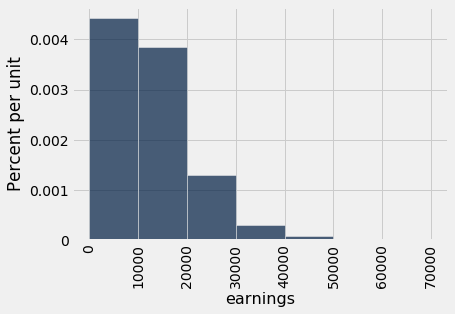

In [72]:
np.random.seed(8)
sample = earnings.sample(30000, with_replacement=False)
sample.show(5), sample.hist(0, bins=np.arange(0, 80000, 10000));

Table 1:


eligible,earnings mean,byr mean
False,12708.3,51.7231
True,12910,51.2121


Table 2:


byr,earnings mean,eligible mean
50,13651.9,0.540905
51,13032.7,0.355619
52,12367,0.253254
53,12160.2,0.25942


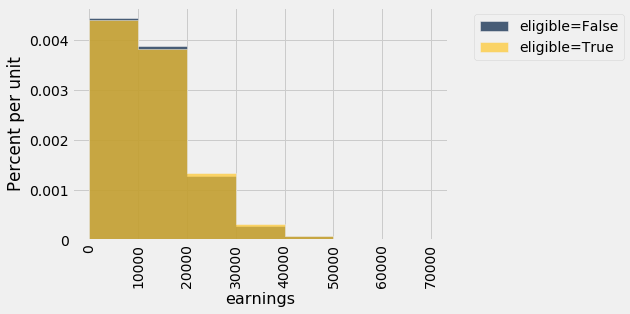

In [73]:
sample.hist("earnings", group="eligible",bins=np.arange(0, 80000, 10000));
print("Table 1:")
sample.select("eligible", "earnings", "byr").group("eligible", np.mean).show()
print("Table 2:")
sample.select("byr", "earnings", "eligible").group("byr", np.mean).show()

**Question 2.2.1:** Table 1 seems to show us that lottery eligibile men had slightly higher earnings: based on Table 1 and Table 2, why do you think this is the case?

*Hint: remember that the `byr` column is birth year, i.e. 50 is 1950.*

```
BEGIN QUESTION
name: q2_2_1
manual: true
```

**SOLUTION:** As you get older, your income/earnings tend to increase. Eligible people are older than non eligible people on average, as the proportion of people drafted decreases each year from 1950.

Race also plays a factor in this dataset (see table 3 below). Unfortunately, the dataset is not very descriptive, and only has two options for race, white or non white. Non white is a very non-descriptive term for a huge, diverse group of people, and this may introduce a variety of confounding factors. So, for the purposes of this project we focus on the white population for which there exists clear historical records, and for which the Angrist paper investigated.

In [74]:
print("Table 3:")
sample.select("race", "earnings", "eligible").group("race", np.mean).show()

Table 3:


race,earnings mean,eligible mean
nonwhite,9367.88,0.359165
white,13815.2,0.344084


eligible,earnings mean
False,14728.7
True,14797.9


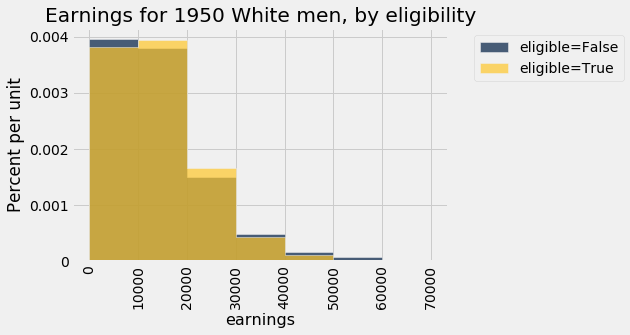

In [75]:
sample.where("byr", 50).where("race", "white").hist("earnings", group="eligible",bins=np.arange(0, 80000, 10000));
plots.title("Earnings for 1950 White men, by eligibility");
sample.where("byr", 50).where("race", "white").select("eligible", "earnings").group("eligible", np.mean).show()

Let's take another sample, stored in `white_50` that contains a random sample of 2000 white men born in 1950 from the `earnings` table. We've given you some important summary statistics for the table as well.

In [76]:
white_50 = earnings.where("byr", 50).where("race", "white").sample(2000, with_replacement=False).drop("byr", "race", "interval")
white_50.show(5);
white_50.group("eligible", np.mean).show();
white_50.group("eligible").show();

earnings,eligible
10768.8,True
21471.4,True
3840.38,False
10489,True
17503.2,True


eligible,earnings mean
False,15899.6
True,15163.2


eligible,count
False,965
True,1035


We want to check if earnings of the two groups, those eligible to be drafted and those not, come from the same distribution. Specifically, we want to check if those eligible to be drafted had lower earnings.

**Question 2.2.2:** What's our null hypothesis?
```
BEGIN QUESTION
name: q2_2_2
manual: true
```

**SOLUTION:** The earnings of eligible and not eligible white men born in 1950 come from the same underlying distribution.

**Question 2.2.3:** What's our alternative hypothesis?

```
BEGIN QUESTION
name: q2_2_3
manual: true
```

**SOLUTION:** The earnings of eligible and not eligible white men born in 1950 come from the different underlying distributions, the distribution for eligible white men born in 1950 is lower on average than that of non eligible.

**Question 2.2.4:** Assign `choice_test_stat` to an integer corresponding to the number of the test statistic we could use to test this hypothesis.

1. The difference in mean earnings of white men eligible to be drafted in 1950 and those who were not eligible
2. The absolute difference in mean earnings of white men eligible to be drafted in 1950 and those who were not eligible
3. The mean earnings of white mean eligible to be drafted in 1950
4. The mean earnings of white mean eligible to be drafted in 1950 - 15168.5

```
BEGIN QUESTION
name: q2_2_4    
```

In [77]:
choice_test_stat = 1 # SOLUTION

In [78]:
# TEST
# Choice should be either 1,2,3 or 4
choice_test_stat in [1,2,3,4]

True

In [79]:
# TEST
# Choice should be an integer
type(choice_test_stat) == int

True

In [80]:
# HIDDEN TEST
choice_test_stat == 1

True

**Question 2.2.5:** Define the function `test_stat` to return that test statistic for a given `tbl` like the white_50 table.

```
BEGIN QUESTION
name: q2_2_5
```

In [81]:
def test_stat(tbl):
    grouped = tbl.group("eligible", np.mean) # SOLUTION
    return grouped.column("earnings mean").item(0) - grouped.column("earnings mean").item(1) # SOLUTION

observed = test_stat(white_50) # SOLUTION
observed

736.3929415370585

In [82]:
# TEST
type(observed) == float

True

In [83]:
# TEST
observed == test_stat(white_50)

True

**Question 2.2.6:** Define the function `simulate_stat` that returns one value of the test statistic, simulated under the null hypothesis. 

```
BEGIN QUESTION
name: q2_2_6
```

In [84]:
def simulate_stat():
    shuffled_column = white_50.sample(with_replacement=False).column("eligible") # SOLUTION
    shuffled_table = white_50.with_column("eligible", shuffled_column) # SOLUTION
    return test_stat(shuffled_table) # SOLUTION

simulate_stat()

2257.687124210597

In [85]:
# TEST
# Your function should have some randomness
np.std([simulate_stat() for i in np.arange(5)]) > 0

True

**Question 2.2.7:** Plot a histogram of 250 simulated statistics under the null hypothesis.

*Note: It may take some time for this cell to run*

```
BEGIN QUESTION
name: q2_2_7
manual: true
```

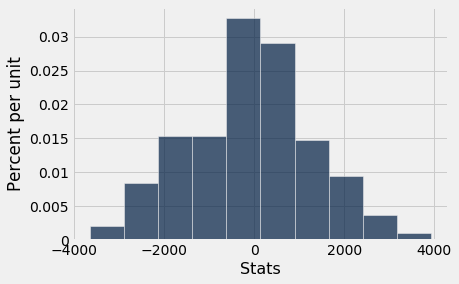

In [86]:
# BEGIN SOLUTION
stats = make_array()
reps = 250

for i in np.arange(reps):
    stats = np.append(stats, simulate_stat())

Table().with_column("Stats", stats).hist(0)
# END SOLUTION

**Question 2.2.8:** Calculate the `p_value` of the test and assign `reject` to `True` if we should reject the null hypothesis using a 5% p-value cutoff or `False` otherwise.

```
BEGIN QUESTION
name: q2_2_8
```

In [87]:
p_value = np.count_nonzero(stats >= observed) / len(stats) # SOLUTION
reject = p_value <= 0.05 # SOLUTION

print(f"Calculated p-value to be {p_value}; Should we reject? {reject}")

Calculated p-value to be 0.272; Should we reject? False


In [88]:
# TEST
# P-value is a probability
0 <= p_value <= 1

True

In [89]:
# TEST
# reject is a boolean
type(reject) == bool or type(reject) == np.bool_

True

In [90]:
# HIDDEN TEST 
p_value == np.count_nonzero(stats >= observed) / len(stats)

True

In [91]:
# HIDDEN TEST
reject == (p_value <= 0.05 )

True

## Section 3: A  New Statistic

Now let's test the same hypothesis using a new test statistic. This test statistic is called "Rank sum".

What is a rank? A rank is the position of a value when you sort the entire dataset in ascending order, starting at 1. 

For example, let's say we have the data 5, 8, 9, 7. The corresponding ranks are 1, 3, 4, 2, because the sorted data set is 5, 8, 9, 7.

We do have to worry about breaking ties for this dataset, because we have many zeros.

To break ties, we assign all values that are equal to the same rank. To do this, we must

1. Get a list of all the unique values
2. Sort that list in ascending order
3. Rank that list starting at 1
4. Assign those ranks back to the original data

For the data 6, 6, 7, 5, we get ranks 2, 2, 3, 1. For 0, 0, 0, 15.8, 12.6 we get 1, 1, 1, 3, 2.

The **rank sum** for a group within a dataset is equal to the sum of all the ranks of the values **within that group**.

We will use the rank sum for those eligible to be drafted as our new statistic.

*Note: Our alternative hypothesis is actually a bit different now, as we aren't concerned with the average, rather we are concerned with the rank sum, but this shouldn't affect your work.*

**Question 2.3.1:** Consider two samples:

|Sample 1| Sample 2|
|---------|------|
|1|3|
|2|4|
|10|6|

And their corresponding statistic values:

|Sample | Mean | Rank Sum |
|--------|-----|----------|
|Sample 1|4.333|9|
|Sample 2| 4.333| 12|

How might this Rank Sum statistic help us determine differences in numerical distributions in ways that the mean cannot? In your answer, make sure to specifically reference the provided samples.

```
BEGIN QUESTION
name: q2_3_1
manual: true
```

**SOLUTION:** The Rank Sum statistic is less impacted by outliers than the mean! The sample point 10 in Sample 1 makes the Sample 1 mean equal to the Sample 2 mean, even though most of the points in Sample 1 are smaller than the points in Sample 2.

**Question 2.3.2:** Which values of the rank sum statistic correspond to our alternative hypothesis that those who were eligible (white men born in 1950 who had their birthday chosen) had a lower income?

1. Larger Positive Values
2. Smaller Positive Values

Assign `which_direction` to either `1` or `2`.

```
BEGIN QUESTION
name: q2_3_2
```

In [92]:
which_direction = 2 # SOLUTION

In [93]:
# TEST 
# Assign to either 1 or 2
which_direction in [1, 2]

True

In [94]:
# HIDDEN TEST
which_direction == 2

True

**Question 2.3.3:** Implement the function `rank_sum_stat` that takes in a `tbl` like `white_50` and returns the rank sum for the eligible group's earnings.

To answer this question, define the function `tbl_with_ranks` that takes in any `tbl`, and a string `col` and returns a new table, sorted by `col` in ascending order, with a column called `Rank` that contains the ranks for the corresponding row, ranked by the values in `col`.

*Hint 1: ranks start at 1 and go up by 1 each value*

*Hint 2: make sure to rank all the data at the same time, and then just sum the ranks for the eligible group*

*Hint 3: remember that the group function combines equal values, including equal numerical values!*

*Hint 4: after you get the unique values, how could the join function be helpful?*

```
BEGIN QUESTION
name: q2_3_3
```

In [95]:
def tbl_with_ranks(tbl, col):
    unique_values = tbl.group(col) # SOLUTION
    sorted_unique_values = unique_values.sort(col) # SOLUTION
    unique_ranks_arr = np.arange(1, sorted_unique_values.num_rows + 1) # SOLUTION
    sorted_unique_with_ranks = sorted_unique_values.with_column("Rank", unique_ranks_arr) # SOLUTION
    
    original_table_with_unique_ranks = tbl.join(col, sorted_unique_with_ranks) # SOLUTION
    return original_table_with_unique_ranks.sort(col)

def rank_sum_test(tbl):
    tbl_and_ranks = tbl_with_ranks(tbl, "earnings")
    rank_sums = tbl_and_ranks.group("eligible", sum) # SOLUTION
    return rank_sums.where("eligible", True).column("Rank sum").item(0)  # SOLUTION

observed_rank_sum = rank_sum_test(white_50) # SOLUTION
observed_rank_sum

584285

In [96]:
# TEST
# This test makes sure that your helper function computes the correct ranks for the 6,6,7,5 example
example_table = Table().with_columns("value", make_array(6,6,7,5))
example_table_with_ranks = tbl_with_ranks(example_table, "value")
all(example_table_with_ranks.sort("value").column("Rank") == make_array(1, 2, 2, 3))

True

In [97]:
# TEST
# This test makes sure that your helper function computes the correct ranks for the 0, 0, 0, 15.8, 12.6 example
example_table = Table().with_columns("value", make_array(0, 0, 0, 15.8, 12.6))
example_table_with_ranks = tbl_with_ranks(example_table, "value")
all(example_table_with_ranks.sort("value").column("Rank") == make_array(1, 1, 1, 2, 3))

True

In [98]:
# HIDDEN TEST
observed_rank_sum == rank_sum_test(white_50)

True

In [99]:
# HIDDEN TEST
example_table = Table().with_columns("earnings", make_array(0, 0, 0, 15.8, 12.6), "eligible", \
                                     make_array(True, False, False, True, True))
rank_sum_test(example_table) == 6

True

In [100]:
# HIDDEN TEST
example_table = Table().with_columns("earnings", make_array(6,6,7,5), "eligible", \
                                     make_array(True, True, True, False))
rank_sum_test(example_table) == 7

True

**Question 2.3.4:** Define the function `simulate_rank_sum_stat` that returns one value of the rank sum test statistic, simulated under the null hypothesis.    

```
BEGIN QUESTION
name: q2_3_4
```

In [101]:
def simulate_rank_sum_stat():
    shuffled_column = white_50.sample(with_replacement=False).column("eligible") # SOLUTION
    shuffled_table = white_50.with_column("eligible", shuffled_column) # SOLUTION
    return rank_sum_test(shuffled_table) # SOLUTION

simulate_rank_sum_stat()

574287

In [102]:
# TEST
# Your function should be random
np.std([simulate_rank_sum_stat() for i in np.arange(10)]) > 0

True

**Question 2.3.5:** Plot a histogram of 100 simulated rank sum statistics under the null hypothesis.

*Note this may take some time to run*

```
BEGIN QUESTION
name: q2_3_5
manual: true
```

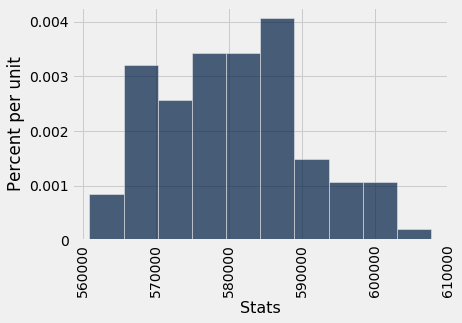

In [103]:
# BEGIN SOLUTION
stats = make_array()
reps = 100

for i in np.arange(reps):
    stats = np.append(stats, simulate_rank_sum_stat())

Table().with_column("Stats", stats).hist(0)
# END SOLUTION

**Question 2.3.6:** Assign `p_value_rank` to the p-value of of the rank sum test and assign `reject_rank` to `True` if we should reject the null hypothesis using a 5% p-value cutoff or `False` otherwise.

```
BEGIN QUESTION
name: q2_3_6
```

In [104]:
p_value_rank = np.count_nonzero(stats <= observed_rank_sum) / len(stats) # SOLUTION
reject_rank = p_value_rank < 0.05 # SOLUTION

print(f"Calculated p-value to be {p_value_rank}; Should we reject? {reject_rank}")

Calculated p-value to be 0.62; Should we reject? False


In [105]:
# TEST
# p_value_rank is a probability
0 <= p_value_rank <= 1

True

In [106]:
# TEST
# reject_rank is a boolean
type(reject_rank) == bool or type(reject_rank) == np.bool_

True

In [107]:
# HIDDEN TEST 
p_value_rank == np.count_nonzero(stats <= observed_rank_sum) / len(stats)

True

In [108]:
# HIDDEN TEST
reject_rank == (p_value_rank <= 0.05 )

True

**Question 2.3.7:** Angrist found that:

>"Estimates based on the draft lottery indicate that as much as ten years after their
discharge from service, white veterans who
served at the close of the Vietnam era earned
substantially less than nonveterans. The annual earnings loss to white veterans is on the
order of $3,500 current dollars, or roughly
15 percent of yearly wage and salary earnings in the early 1980s. In contrast, the estimated veteran effects for nonwhites are not
statistically significant"

Angrist used different methods (some of which we will learn about in the coming weeks). Using our methods, are we able to duplicate Angrist's findings? Do you think our findings invalidate Angrist's conclusions? Do Angrist's findings invalidate the methods we have taught you?

```
BEGIN QUESTION
name: q2_3_7
manual: true
```

**SOLUTION:** Our findings don't invalidate Angrist's conclusions. Angrist, a trained econometrist, built a more complex model than us. This exercise shows us that we have much to learn after this class!

This should be a pretty open ended question-- I think it is especially important to have because we don't tell our students how careful they should be really when using the super powerful methods we've taught them (I talked about this on slack last semester)

**You're finished!** Congratulations on mastering* hypothesis testing and bootstrapping. Time to submit.

## Submission

Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. **IMPORTANT: Make sure to check that your submission is not empty. We cannot guarantee that the submission will be valid, so please check it now.** If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

**NOTE:** The tests that are provided are not comprehensive and act as sanity checks (i.e. to make sure you answer is in the correct form, etc.). Passing the tests for a question does not mean that you answered the question correctly.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

In [ ]:
_ = ok.submit()